In [1]:
%env DISPLAY

UsageError: Environment does not have key: DISPLAY


In [2]:
%set_env DISPLAY :0.0

env: DISPLAY=:0.0


In [3]:
%env DISPLAY

':0.0'

In [4]:
# !xeyes

In [5]:
# %matplotlib auto

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mcm_cn2023.utils.convertEMF import exportEmf

plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]  # 黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决无法显示符号的问题

In [7]:
df = pd.read_excel(r"../../assets/附件.xlsx")
df

,海水深度/m,Unnamed: 1,横向坐标/NM（由西向东）,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202
0,NaN,NaN,0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14,...,3.82,3.84,3.86,3.88,3.90,3.92,3.94,3.96,3.98,4.00
1,纵向坐标/NM\n（由南向北）,0.00,24.40,24.12,23.85,23.59,23.34,23.10,22.88,22.67,...,179.52,181.44,183.37,185.31,187.26,189.23,191.20,193.19,195.19,197.20
2,NaN,0.02,24.32,24.04,23.77,23.51,23.27,23.03,22.81,22.60,...,178.75,180.66,182.58,184.52,186.46,188.42,190.38,192.36,194.35,196.35
3,NaN,0.04,24.25,23.97,23.70,23.44,23.19,22.96,22.74,22.53,...,177.99,179.89,181.80,183.73,185.66,187.61,189.57,191.54,193.52,195.51
4,NaN,0.06,24.17,23.89,23.63,23.37,23.13,22.89,22.67,22.46,...,177.23,179.12,181.02,182.94,184.86,186.80,188.75,190.71,192.68,194.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,NaN,4.92,82.18,82.21,82.23,82.26,82.28,82.30,82.32,82.34,...,67.70,67.52,67.34,67.16,66.98,66.80,66.61,66.43,66.24,66.05
248,NaN,4.94,82.73,82.76,82.79,82.81,82.84,82.86,82.88,82.90,...,67.56,67.38,67.19,67.00,66.81,66.61,66.42,66.23,66.03,65.84
249,NaN,4.96,83.29,83.31,83.34,83.37,83.39,83.42,83.44,83.46,...,67.43,67.23,67.03,66.84,66.64,66.44,66.23,66.03,65.83,65.62
250,NaN,4.98,83.84,83.87,83.90,83.93,83.95,83.98,84.00,84.03,...,67.29,67.09,66.88,66.68,66.47,66.26,66.05,65.84,65.62,65.41


In [8]:
# 创建一个示例的二维数组，你需要将其替换为你自己的数据
# 这里的数组表示海床高度，可以是浮点数
sea_floor_data = df.iloc[2:, 2:]

sea_floor_data = sea_floor_data.apply(lambda x: 0 - x)

sea_floor_data

,横向坐标/NM（由西向东）,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202
2,-24.32,-24.04,-23.77,-23.51,-23.27,-23.03,-22.81,-22.60,-22.39,-22.21,...,-178.75,-180.66,-182.58,-184.52,-186.46,-188.42,-190.38,-192.36,-194.35,-196.35
3,-24.25,-23.97,-23.70,-23.44,-23.19,-22.96,-22.74,-22.53,-22.33,-22.14,...,-177.99,-179.89,-181.80,-183.73,-185.66,-187.61,-189.57,-191.54,-193.52,-195.51
4,-24.17,-23.89,-23.63,-23.37,-23.13,-22.89,-22.67,-22.46,-22.26,-22.07,...,-177.23,-179.12,-181.02,-182.94,-184.86,-186.80,-188.75,-190.71,-192.68,-194.67
5,-24.10,-23.82,-23.56,-23.30,-23.06,-22.83,-22.61,-22.40,-22.20,-22.01,...,-176.47,-178.35,-180.24,-182.15,-184.07,-186.00,-187.94,-189.89,-191.85,-193.83
6,-24.03,-23.76,-23.49,-23.24,-23.00,-22.76,-22.55,-22.34,-22.14,-21.95,...,-175.71,-177.58,-179.47,-181.37,-183.28,-185.20,-187.13,-189.07,-191.03,-192.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-82.18,-82.21,-82.23,-82.26,-82.28,-82.30,-82.32,-82.34,-82.36,-82.38,...,-67.70,-67.52,-67.34,-67.16,-66.98,-66.80,-66.61,-66.43,-66.24,-66.05
248,-82.73,-82.76,-82.79,-82.81,-82.84,-82.86,-82.88,-82.90,-82.92,-82.94,...,-67.56,-67.38,-67.19,-67.00,-66.81,-66.61,-66.42,-66.23,-66.03,-65.84
249,-83.29,-83.31,-83.34,-83.37,-83.39,-83.42,-83.44,-83.46,-83.48,-83.50,...,-67.43,-67.23,-67.03,-66.84,-66.64,-66.44,-66.23,-66.03,-65.83,-65.62
250,-83.84,-83.87,-83.90,-83.93,-83.95,-83.98,-84.00,-84.03,-84.05,-84.07,...,-67.29,-67.09,-66.88,-66.68,-66.47,-66.26,-66.05,-65.84,-65.62,-65.41


Failed to get connection
** (inkscape:81799): CRITICAL **: 03:58:30.921: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:81799): CRITICAL **: 03:58:30.921: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:81799): CRITICAL **: 03:58:30.921: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


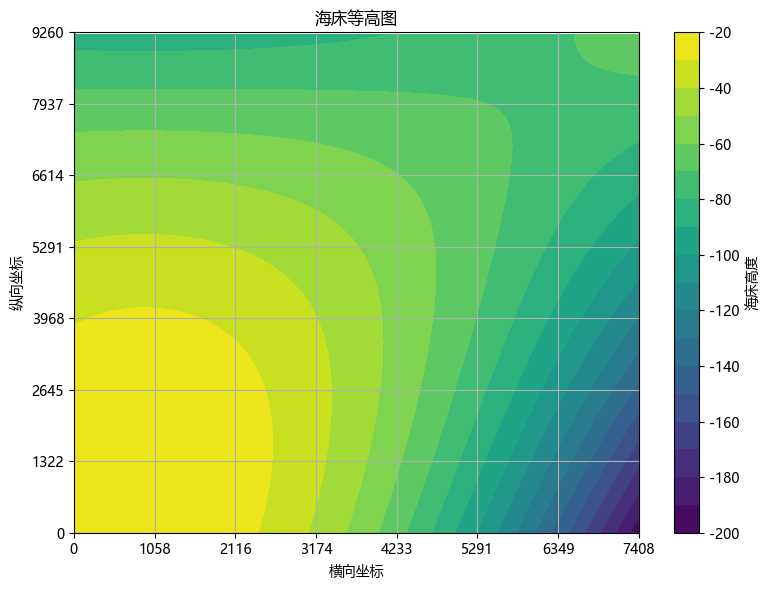

In [21]:
# 创建一个网格
x = np.arange(0, sea_floor_data.shape[1])
y = np.arange(0, sea_floor_data.shape[0])
X, Y = np.meshgrid(x, y)

# 绘制地形图
plt.figure(figsize=(8, 6))
plt.contourf(
    X, Y, sea_floor_data, cmap="viridis", levels=20
)  # 修改cmap和levels以调整颜色和等高线数量
plt.colorbar(label="海床高度")
plt.title("海床等高图")
plt.xlabel("横向坐标")
plt.ylabel("纵向坐标")
plt.grid(True)
plt.xticks(np.linspace(0, 200, 8), list(map(int, np.linspace(0, 4 * 1852, 8))))
plt.yticks(np.linspace(0, 250, 8), list(map(int, np.linspace(0, 5 * 1852, 8))))

plt.tight_layout()
exportEmf('第四问等高图')
plt.show()

/tmp/ipykernel_80850/1247091927.py:26: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.

Failed to get connection
** (inkscape:81744): CRITICAL **: 03:58:05.294: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:81744): CRITICAL **: 03:58:05.294: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:81744): CRITICAL **: 03:58:05.294: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


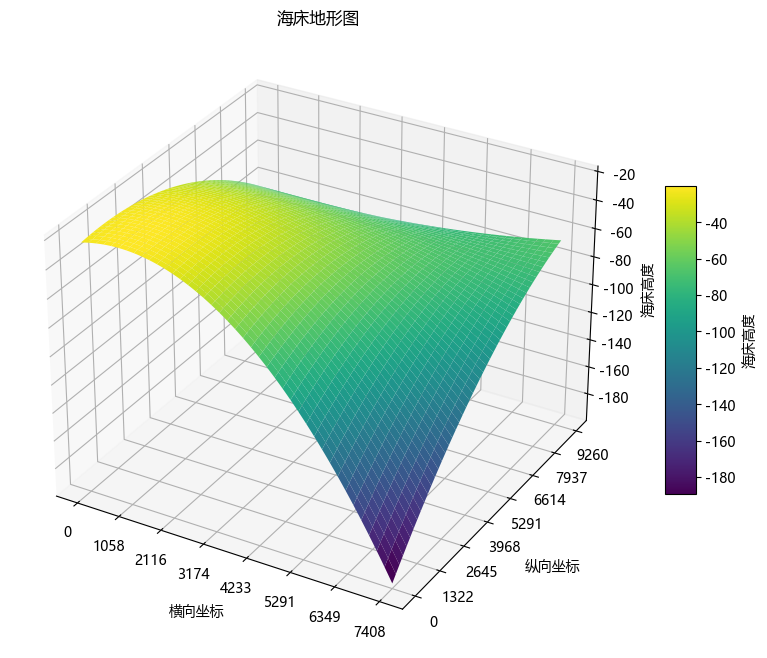

In [20]:
# 创建X和Y坐标网格
x = np.arange(0, sea_floor_data.shape[1])
y = np.arange(0, sea_floor_data.shape[0])
X, Y = np.meshgrid(x, y)

# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# 绘制平滑曲面
surf = ax.plot_surface(X, Y, sea_floor_data, cmap="viridis")

# 添加轴标签
ax.set_xlabel("横向坐标", labelpad=10)
ax.set_ylabel("纵向坐标", labelpad=15)
ax.set_zlabel("海床高度", rotation=90)
ax.set_xticks(np.linspace(0, 200, 8), list(map(int, np.linspace(0, 4 * 1852, 8))))
ax.set_yticks(np.linspace(0, 250, 8), list(map(int, np.linspace(0, 5 * 1852, 8))))

# 添加标题
plt.title("海床地形图")

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="海床高度")

plt.tight_layout()
exportEmf('第四问地形图')
plt.show()

In [18]:
import matplotlib

terrain_cmap = matplotlib.cm.get_cmap("terrain")


def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0 / (pl_entries - 1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k * h)[:3]) * 255))
        pl_colorscale.append([k * h, "rgb" + str((C[0], C[1], C[2]))])

    return pl_colorscale


terrain = matplotlib_to_plotly(terrain_cmap, 255)

/tmp/ipykernel_80850/1568551785.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [12]:
import plotly
import plotly.graph_objects as go
import plotly.io as pio

plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain, z=sea_floor_data)])

# 调整 3D 场景的角度、旋转和视角
fig.update_layout(
    margin=dict(l=0, r=100, b=100, t=0),  # 调整边距，设置为适当的值
)


# Note that include_plotlyjs is used as cdn so that the static site generator can read it and present it on the browser. This is not typically required.
html = plotly.offline.plot(fig, filename="3d-terrain-plotly.html")

In [13]:
pio.write_image(fig, "plotly_example.svg", width=800, height=600, scale=0.5)